In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


# Importing The Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Data Collection & Analysis

In [3]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# number of row and column
df.shape

(1338, 7)

In [6]:
# getting some informaations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Categorical Features:
> Sex

> Smoker

>Region

In [7]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


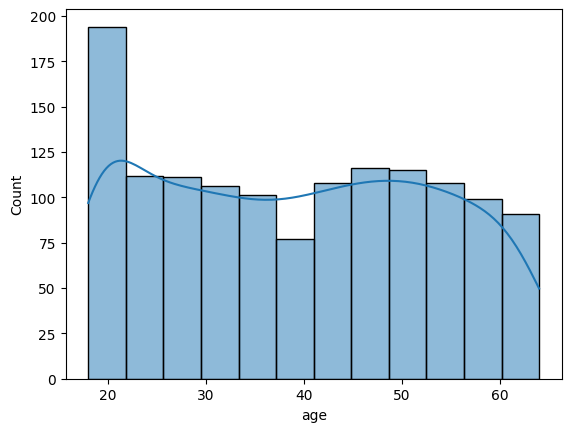

In [9]:
#  Distribution of age value

sns.histplot(x = "age", data = df,kde = True)
plt.show()

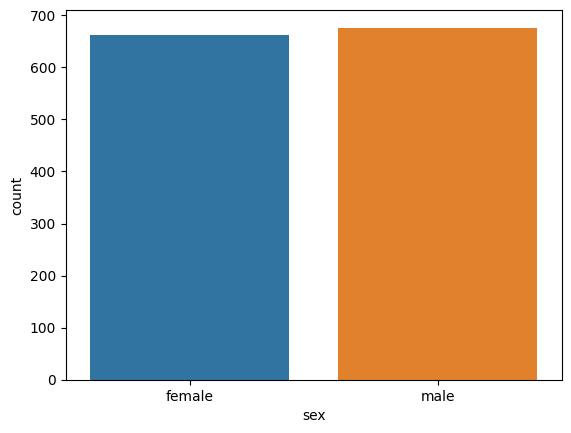

In [10]:
# Gender Column
sns.countplot(x = "sex",data = df)
plt.show()

In [11]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


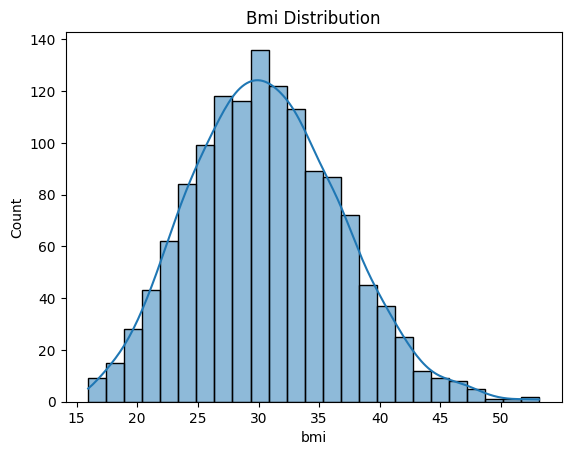

In [12]:
#  Bmi Distribution 

sns.histplot(df["bmi"],kde = True)
plt.title("Bmi Distribution")
plt.show()

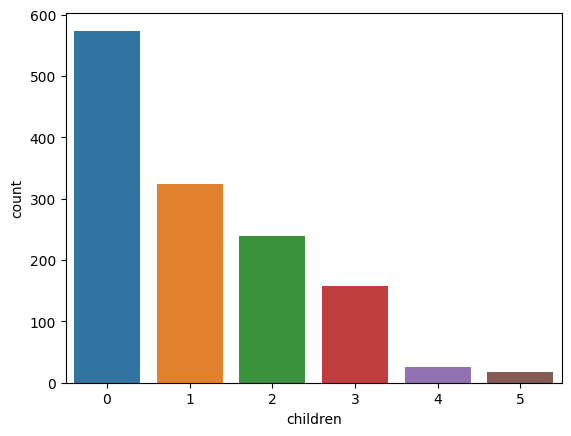

In [13]:
#  children column
sns.countplot(x = "children",data = df)
plt.show()

In [14]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

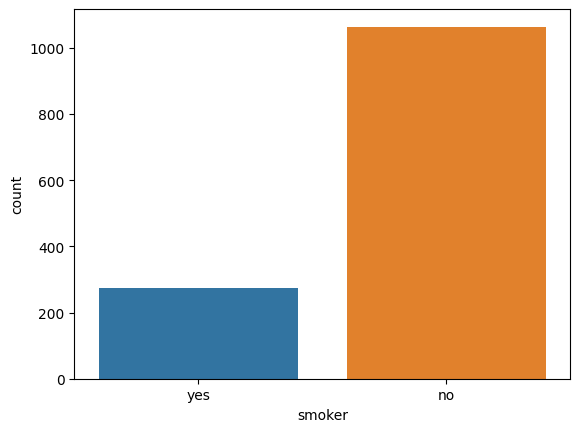

In [15]:
#  smoker column
sns.countplot(x = "smoker",data = df)
plt.show()

In [16]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

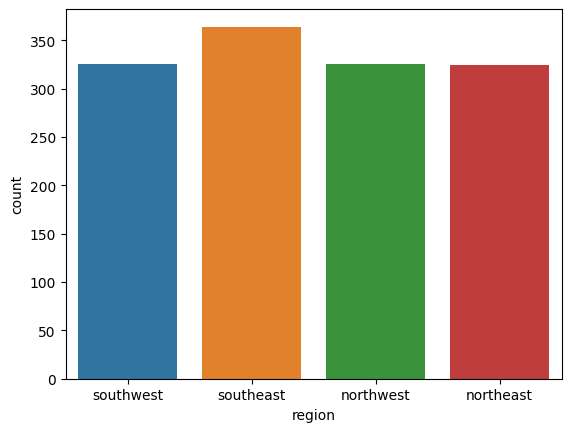

In [17]:
#  region column
sns.countplot(x = "region",data = df)
plt.show()

In [18]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


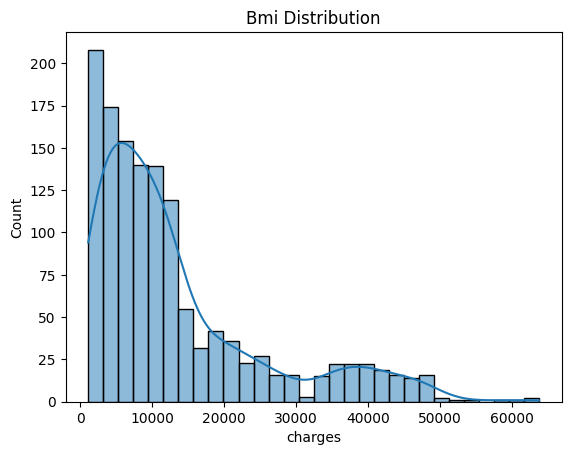

In [19]:
#  Distribution  of change value

sns.histplot(df["charges"],kde = True)
plt.title("Bmi Distribution")
plt.show()

# Data Pre-Processing
> Encoding the categorical feature

In [20]:
# encoding sex column
df.replace({"sex":{"male" : 0, "female" : 1}},inplace = True)

# encoding somker column
df.replace({"smoker":{"yes":0,"no":1}},inplace = True)

# encoding region column
df.replace({"region":{"southeast": 0 , "southwest":1,"northwest":2, "northeast":3}},inplace = True)

/tmp/ipykernel_17/2873886899.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"sex":{"male" : 0, "female" : 1}},inplace = True)
/tmp/ipykernel_17/2873886899.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"smoker":{"yes":0,"no":1}},inplace = True)
/tmp/ipykernel_17/2873886899.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set 

# Spliting the features anf target

In [21]:
x = df.drop(columns = "charges")

y = df["charges"]

# Spliting the data into training data & testing data

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 30)

# Model Training

In [23]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [24]:
train_data_pre = regressor.predict(x_train)
r2_train = metrics.r2_score(y_train, train_data_pre)
print(f"R squared value: {r2_train}")

R squared value: 0.7475786452431409


In [25]:

test_data_pre = regressor.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_pre)
print(f"R squared value: {r2_train}")

R squared value: 0.7475786452431409


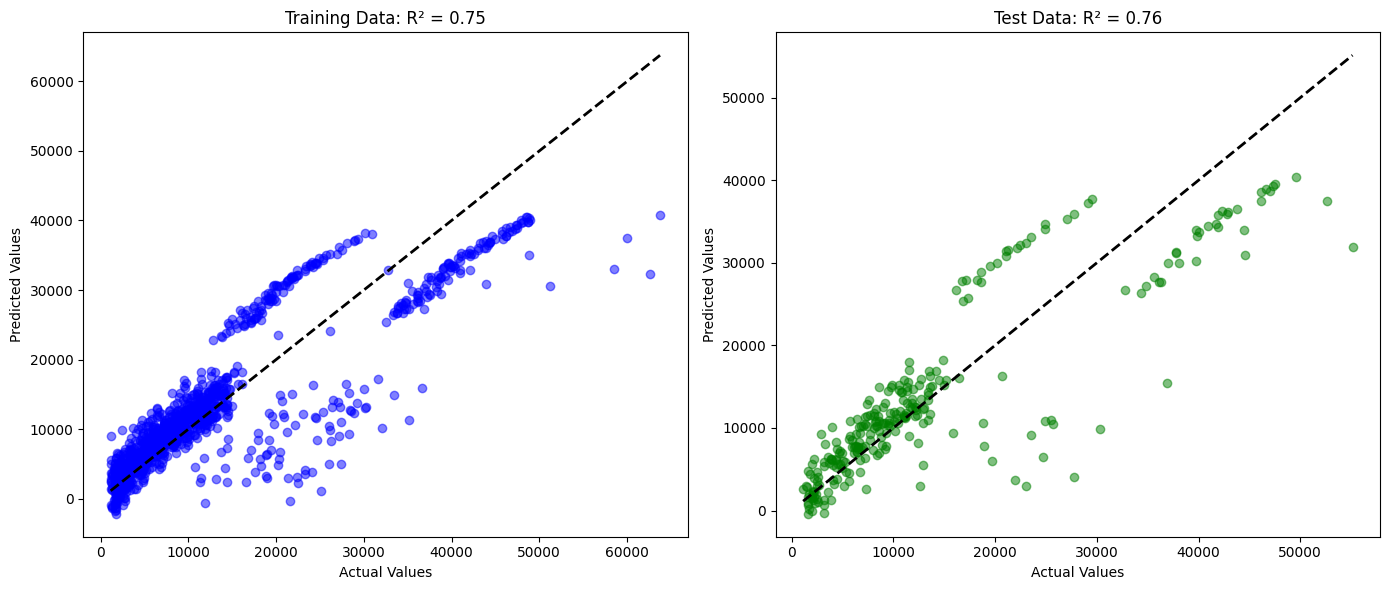

In [26]:
import matplotlib.pyplot as plt

# Training data predictions plot
plt.figure(figsize=(14, 6))

# Plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_data_pre, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Training Data: R² = {r2_train:.2f}')

# Plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_data_pre, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Test Data: R² = {r2_test:.2f}')

# Show plot
plt.tight_layout()
plt.show()
